## Peptide desimmunization:

The prophylactic peptides was deimmunized with the following configurations:

- MixMHCpred predictor (for the matrices with no alternative motifes)
- A epitope binding threshold of 1% (default)
- For representative HLA-I alleles of the 12 supertypes defined by Lund et al. 
- Mutations with k=2,3,4,5
- subsitions with an allele frequency > 1% (based on multiple sequence alignment)

In [29]:
data_path="../data/"
data_path = '/home/rose/'
library_path="../src/solver/"
WT_SEQ = "MFQTAADKLAAAKDTVVDTLCSAKDTVKEKVVGAKDATADYLGEKKEQMRD"

In [30]:
# load solutions
import sys
sys.path.append(library_path)
import glob
#sols = read_in_solutions(glob.glob(os.path.join(data_path, "*/*.pcl")))

In [31]:
sols = read_in_solutions(glob.glob(os.path.join(data_path, "*/*.pcl")))

In [32]:
sols[0][1]

[(15099.919130643493, -15.914780682461817),
 (15883.61912702233, -21.521788316807147),
 (15883.620127022332, -21.52178841147612),
 (16105.026385946567, -23.91251195112067),
 (18924.15119714993, -32.04090732770225),
 (22883.810098118942, -32.752599828382934),
 (22883.81109811895, -32.75259982927287),
 (24011.305254714927, -32.968617531246544)]

In [33]:
np.array([list(a) for a in sols[0][1]])

TypeError: 'Solution' object is not iterable

In [34]:
sols

[('/home/rose/PvLEA4_k2/PvLEA4_repeats_b0_75_t01_k2.pcl',
  [(15099.919130643493, -15.914780682461817),
   (15883.61912702233, -21.521788316807147),
   (15883.620127022332, -21.52178841147612),
   (16105.026385946567, -23.91251195112067),
   (18924.15119714993, -32.04090732770225),
   (22883.810098118942, -32.752599828382934),
   (22883.81109811895, -32.75259982927287),
   (24011.305254714927, -32.968617531246544)]),
 ('/home/rose/PvLEA4_k3/PvLEA4_repeats_b0_75_t01_k3.pcl',
  [(9600.067332654977, -15.914780682461814),
   (10117.029674132904, -24.247946406922473),
   (10117.030674132906, -24.247946908278557),
   (10338.43693205714, -26.633272111330708),
   (11215.899913249952, -28.78440630223339),
   (11215.900913249952, -28.78440630223339),
   (11453.117067672529, -29.814051228148713),
   (11453.11806767253, -29.81405156026346),
   (11674.523325596767, -32.04090732770225),
   (11674.524325596769, -32.04090732770226),
   (12551.988306789577, -34.61599114255103),
   (16157.189578349218, 

In [35]:
for (n, sol) in sols:
    for s in sol:
        s.hash = hash(s.__hash__())
    

In [36]:
for (n, sol) in sols:
    print(n, len(sol), len(set(sol)))

('/home/rose/PvLEA4_k2/PvLEA4_repeats_b0_75_t01_k2.pcl', 8, 6)
('/home/rose/PvLEA4_k3/PvLEA4_repeats_b0_75_t01_k3.pcl', 26, 15)
('/home/rose/PvLEA4_k4/PvLEA4_repeats_b0_75_t01_k4.pcl', 24, 14)
('/home/rose/PvLEA4_k5/PvLEA4_repeats_b0_75_t01_k5.pcl', 24, 14)


In [37]:
print(sols[0][1][0].objs)
print(WT_SEQ)

(15099.919130643493, -15.914780682461817)
MFQTAADKLAAAKDTVVDTLCSAKDTVKEKVVGAKDATADYLGEKKEQMRD


In [38]:
# write to fasta files
for n, sol in sols:
    print(os.path.join(data_path, os.path.basename(n).replace(".pcl", ".fasta")))
    with open(os.path.join(data_path, os.path.basename(n).replace(".pcl", ".fasta")), "w") as f:
        for i,s in enumerate(sorted(set(sol))):
            f.write(">{name}_{i}_immuno_{im}_energy_{en}\n{mut}\n".format(name=os.path.basename(n).replace(".pcl",""),
                                                                          i=i,
                                                                          im=s.objs[0]/1000, 
                                                                          en=-1.0*s.objs[1],
                                                                          mut=get_mutant_seq(s)))
                                                                                

/home/rose/PvLEA4_repeats_b0_75_t01_k2.fasta
/home/rose/PvLEA4_repeats_b0_75_t01_k3.fasta
/home/rose/PvLEA4_repeats_b0_75_t01_k4.fasta
/home/rose/PvLEA4_repeats_b0_75_t01_k5.fasta


## Plots

In [ ]:
WT_SEQ = "MSRAAVAIALLGCVVAAYGAPAEGHDDAKAEWTGKSWMGKWESTDRIENFDAFISALGLPLEQYGGNHKTFHKIWKEGDHYHHQISVPDKNYKNDVNFKLNEEGTTQHNNTEIKYKYTEDGGNLKAEVHVPSRNKVIHDEYKVNGDELEKTYKVGDVTAKRWYKKSSSS"

In [ ]:
%matplotlib inline
# plot solutions
import sys
sys.path.append("../src/")
import pandas as pd
from preprocessing.utils import EVcouplings

#s=sols[0][1][0]
alleles = pd.read_csv("../data/peptide_design_allele_file.txt",names=["name", "pssm_thresh", "p"])
ev_couplings = EVcouplings("/home/rose/SAHS1_RAMVA_b0.2.model")
pwms = load_pwms(alleles, "../data/")
al_dict = alleles.loc[:,["name","pssm_thresh"]].set_index("name").to_dict()["pssm_thresh"]
all_dict = {al:1.0 for al in al_dict.keys()}

epitopes = get_epitope_mesh(WT_SEQ,pwms,al_dict, binary=True)
plot_epitope_cluster_old(epitopes, WT_SEQ, mutant=None, 
                     epi_length=9, alleles=all_dict, 
                     enrichment=None, enrichment_title="", 
                     plot_title="Wildtype Sequence", start=0, out=None, knwon_epitopes=None)

In [ ]:
len(WT_SEQ)

/home/rose/anaconda3/envs/py2/lib/python2.7/site-packages/ipykernel_launcher.py:15: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  from ipykernel import kernelapp as app
/home/rose/anaconda3/envs/py2/lib/python2.7/site-packages/ipykernel_launcher.py:95: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


('Matrix-width', 51)


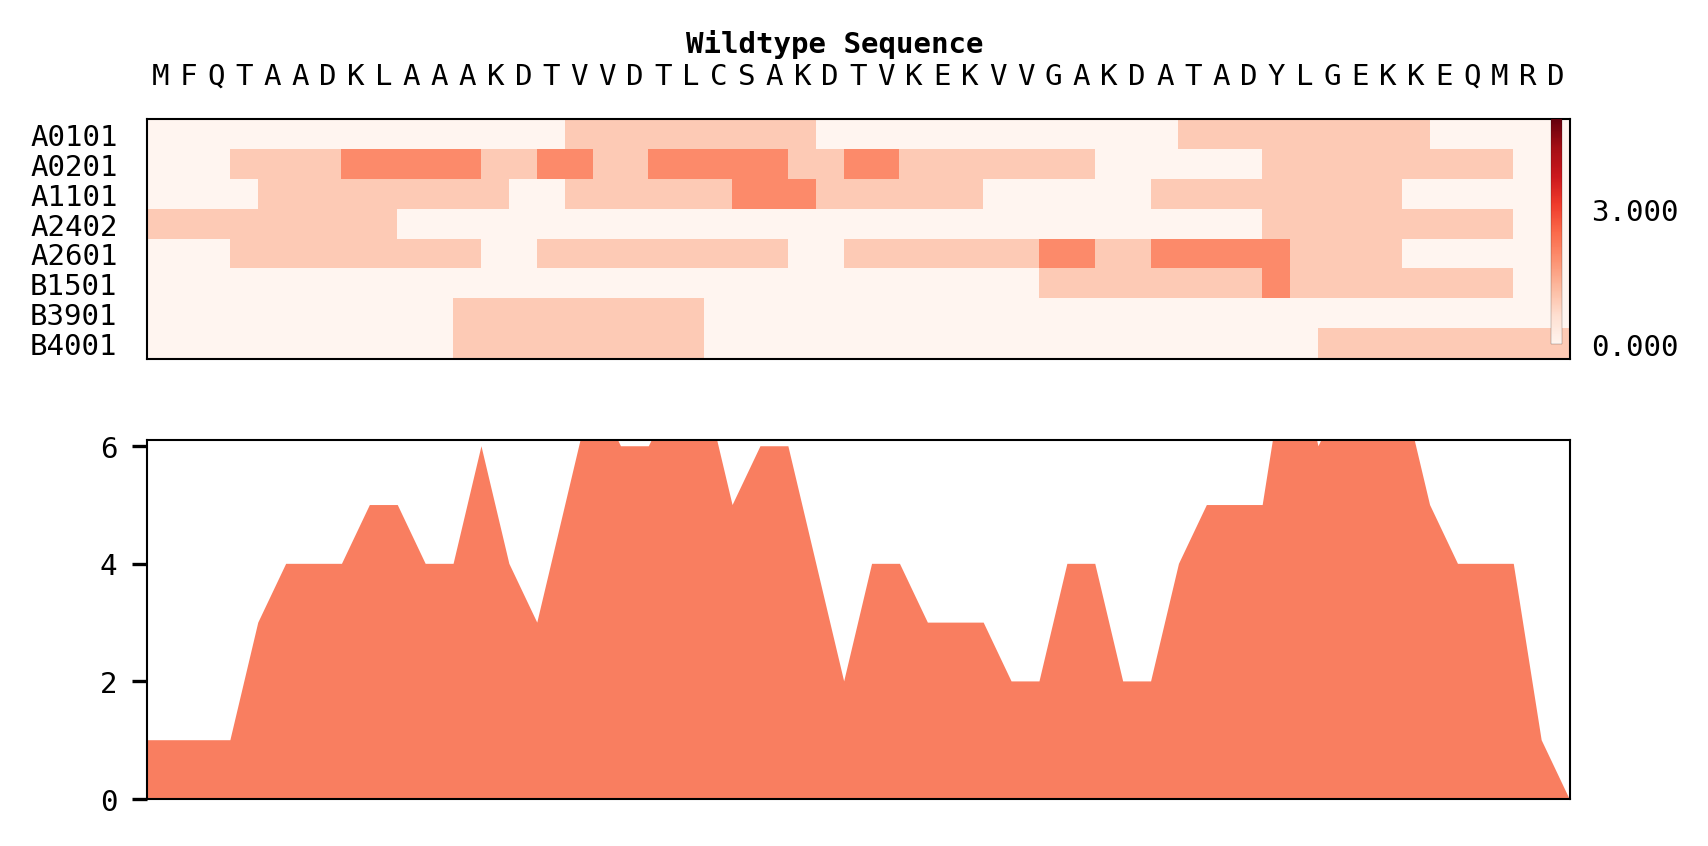

In [21]:
%matplotlib inline
# plot solutions
import sys
sys.path.append("../src/")
import pandas as pd
from preprocessing.utils import EVcouplings

#s=sols[0][1][0]
alleles = pd.read_csv("../data/peptide_design_allele_file.txt",names=["name", "pssm_thresh", "p"])
ev_couplings = EVcouplings("/home/rose/SAHS1_RAMVA_b0.2.model")
pwms = load_pwms(alleles, "../data/")
al_dict = alleles.loc[:,["name","pssm_thresh"]].set_index("name").to_dict()["pssm_thresh"]
all_dict = {al:1.0 for al in al_dict.keys()}

epitopes = get_epitope_mesh(WT_SEQ,pwms,al_dict, binary=True)
plot_epitope_cluster_old(epitopes, WT_SEQ, mutant=None, 
                     epi_length=9, alleles=all_dict, 
                     enrichment=None, enrichment_title="", 
                     plot_title="Wildtype Sequence", start=0, out=None, knwon_epitopes=None)

/home/rose/anaconda3/envs/py2/lib/python2.7/site-packages/ipykernel_launcher.py:15: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  from ipykernel import kernelapp as app
/home/rose/anaconda3/envs/py2/lib/python2.7/site-packages/ipykernel_launcher.py:95: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


('Matrix-width', 51)


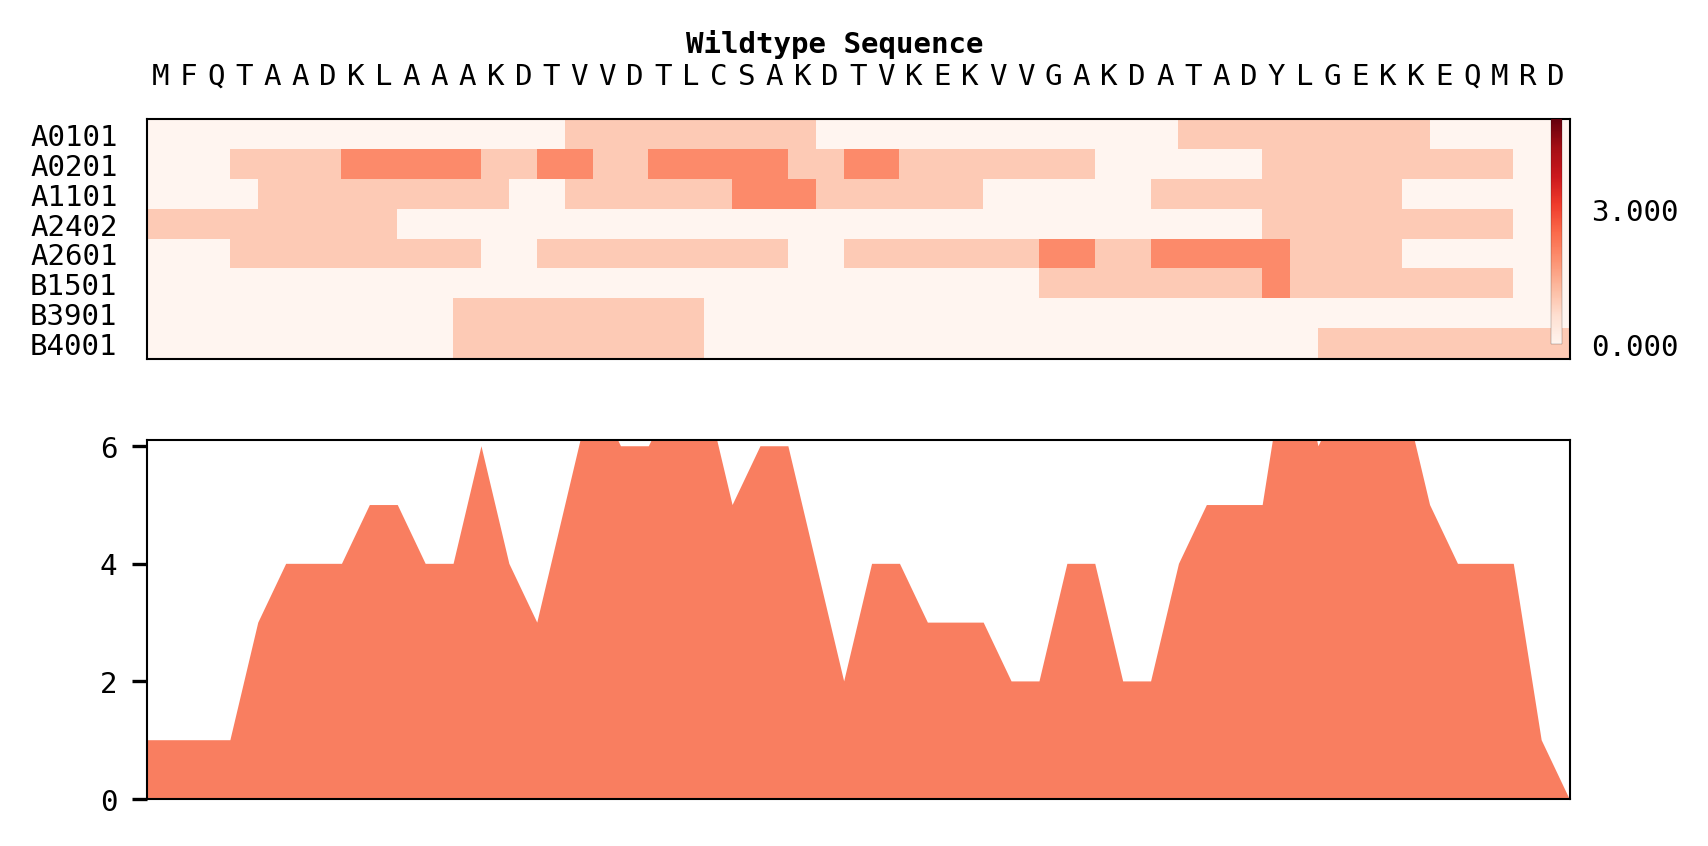

In [39]:
%matplotlib inline
# plot solutions
import sys
sys.path.append("../src/")
import pandas as pd
from preprocessing.utils import EVcouplings

#s=sols[0][1][0]
alleles = pd.read_csv("../data/peptide_design_allele_file.txt",names=["name", "pssm_thresh", "p"])
ev_couplings = EVcouplings("../data/PvLEA4_repeats_b0.75.model")
pwms = load_pwms(alleles, "../data/")
al_dict = alleles.loc[:,["name","pssm_thresh"]].set_index("name").to_dict()["pssm_thresh"]
all_dict = {al:1.0 for al in al_dict.keys()}

epitopes = get_epitope_mesh(WT_SEQ,pwms,al_dict, binary=True)
plot_epitope_cluster_old(epitopes, WT_SEQ, mutant=None, 
                     epi_length=9, alleles=all_dict, 
                     enrichment=None, enrichment_title="", 
                     plot_title="Wildtype Sequence", start=0, out=None, knwon_epitopes=None)




/home/rose/anaconda3/envs/py2/lib/python2.7/site-packages/ipykernel_launcher.py:31: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.


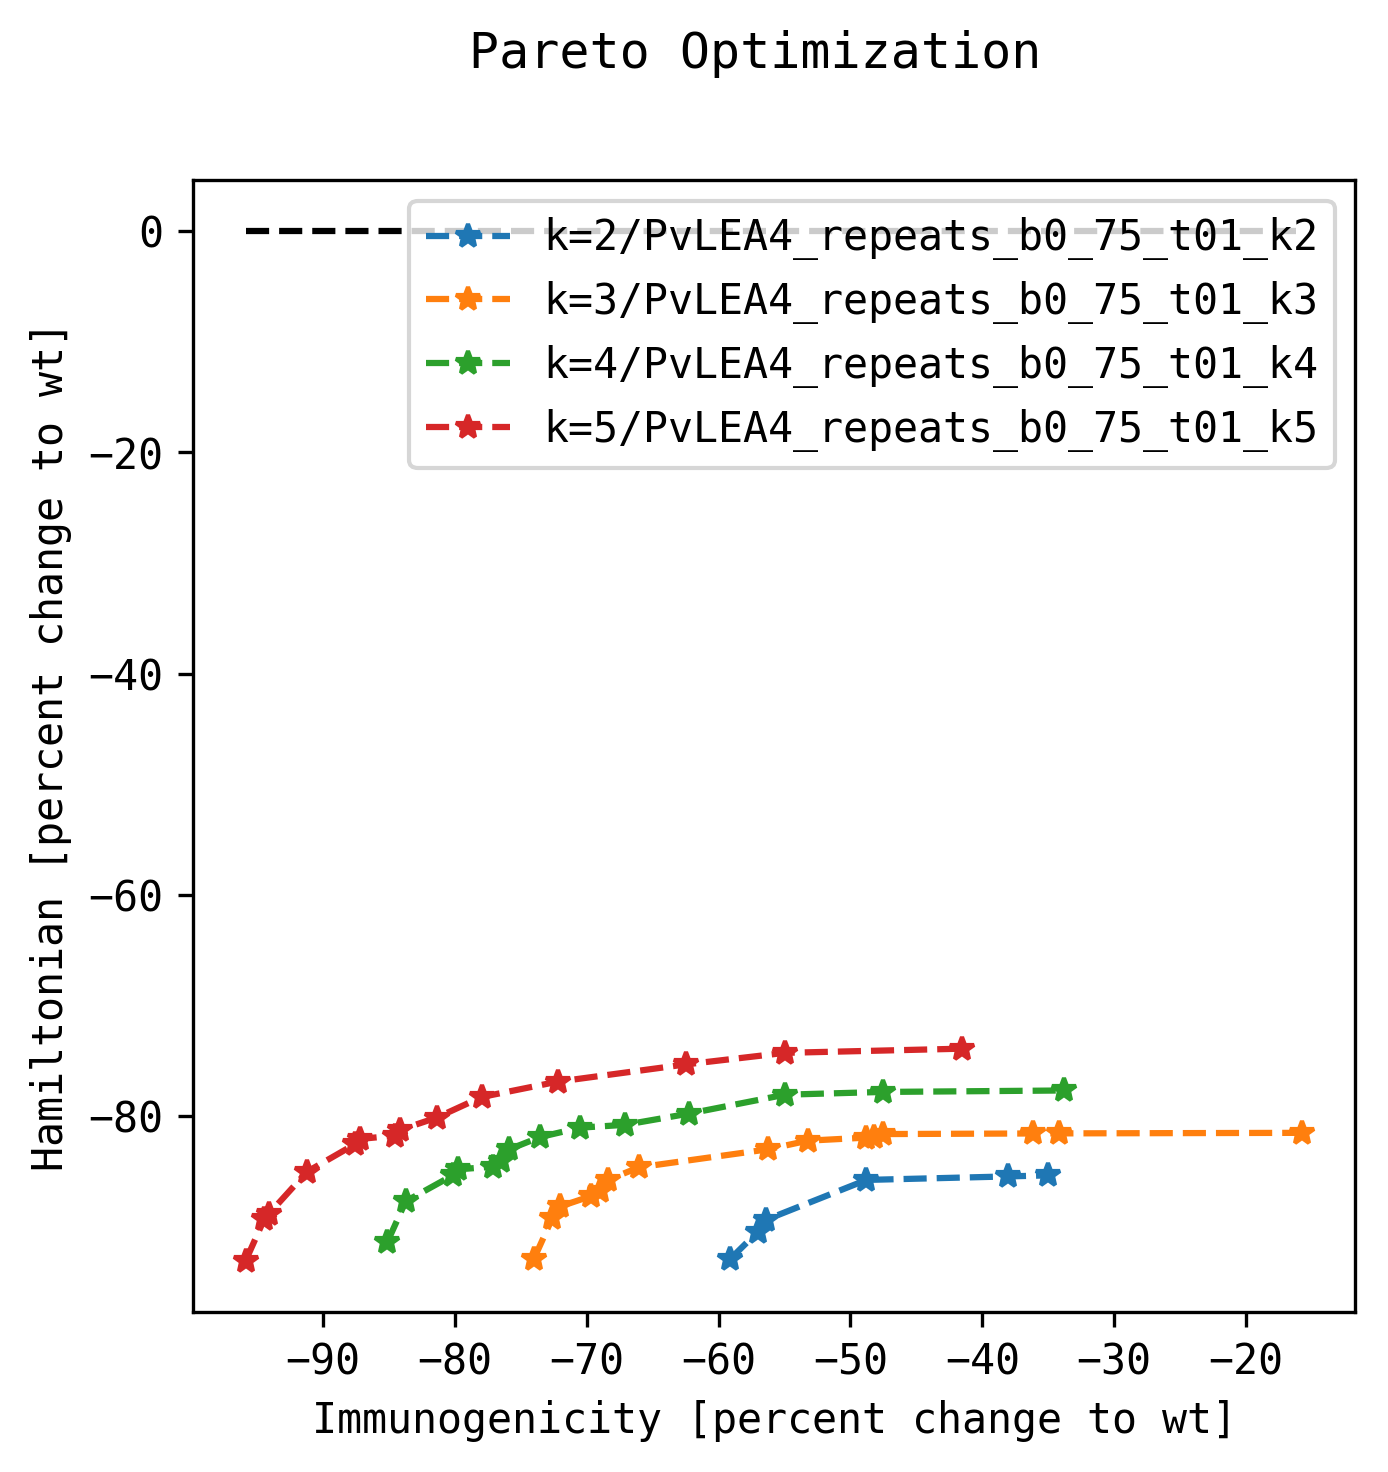

In [40]:
#plot pareto front
al_df = alleles.set_index("name")
wt_imm,wt_en=calc_wildtype_point(WT_SEQ, pwms, al_df, ev_couplings)
f=plot_pareto_front(sols, wt_imm, wt_en)
f.suptitle('Pareto Optimization')
f.savefig('../Pareto_Optima.png')

In [25]:
name

NameError: name 'name' is not defined

In [26]:
sol_dir

NameError: name 'sol_dir' is not defined

In [27]:
import re
#plot all solutions as epitope grid
for fn,sol in sols[1:]:
    m = re.search('../data/*/(.+)_repeats_.*_k(.+?).pcl', fn)
    name = m.group(1).split('/')[1]
    k = m.group(2)
    sol_dir = os.path.join(data_path,"{}_k{}".format(name,k))
    if not os.path.exists(sol_dir):
        os.mkdir(sol_dir)
    
        
    for i,s in enumerate(sorted(set(sol))):
        seq = get_mutant_seq(s)
        epitopes = get_epitope_mesh(seq,pwms,al_dict, binary=True)
        f=plot_epitope_cluster_old(epitopes, WT_SEQ, mutant=seq, 
                     epi_length=9, alleles=all_dict, 
                     enrichment=None, enrichment_title="", 
                     plot_title="{}_k{}_sol{}_im{}_en{}".format(name,k,i, s.objs[0]/10000, -1.0*s.objs[1]), 
                     start=0, out=os.path.join(sol_dir,"{}_k{}_s{}.pdf".format(name,k,i)), 
                     knwon_epitopes=None)



# Python function library

In [1]:
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from matplotlib.figure import Figure
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.collections import PolyCollection
from matplotlib.colors import colorConverter
import matplotlib.pyplot as plt
import numpy as np
from copy import deepcopy
import collections
from pylab import *
import os
import collections
import pandas
import pickle
import numpy as np

In [2]:
def plot_pareto_front(sols, wt_im, wt_en):
    import re
    
    fig = figure(figsize=(5, 5), dpi=300)
    labels = []
    wt_en = -1.0*wt_en
    x_min,x_max = float("inf"),-float("inf")
    for fn, sol in sols:
        y = []
        x = []
        m = re.search('_k(.+?).pcl', fn)
        name = m.group(1)
        for s in sorted(set(sol)):
            im = s.objs[0]/10000
            en = -1.0*s.objs[1]
            x.append( ((im - wt_im)/wt_im)*100)
            y.append( ((en - wt_en)/wt_en)*100)
        x_min = min(min(x),x_min)
        x_max = max(max(x),x_max)
        plt.plot(x,y,'*--')
        labels.append("k={}".format(name))
    plt.hlines(0.0,x_min,x_max, linestyles="dashed")
    plt.xlabel("Immunogenicity [percent change to wt]")
    plt.ylabel("Hamiltonian [percent change to wt]")
    plt.legend(labels)
    return fig

In [3]:
def plot_epitope_cluster_update_joshua(epitopes, wt, mutant, enrichment=None, 
                         enrichment_title="", alleles=None, excluded_positions=None, 
                         epi_length=9, plot_title=None, start=0, out=None, knwon_epitopes=None):
    """Create epitope cluster plot.
 
    Parameters
    ----------
    wildtype : `Wildtype`
        The wildtype with already predicted epitope positions.
    mutant : str
        A single mutant sequence of the wildtype.
    enrichment : list of tuple (int, float)
        List of enriched positions and their enrichment score, as tuple:
        (position, enrichment score).
    enrichment_title : str
        String specifying what kind of enrichment it is (gets plotted)
    alleles: a dictionary with key: 
        allele_name value: frequency
        -> is used to calculated weighted immuno scores
    excluded_positions : list of int
        List of positions excluded from de-immunization calculations.
    epitope_length : int
        Length of an epitope.
    plot_title : str
        (optional) title of plot
    start: int
        Start is added to the x-axis to match for example thr Uniprot positions
    out : str
        Name of output file.
    knwon_epitopes : dictionary
        Similar to epitopes but with already known ones
 
    """
    def _get_epitopes(sol, seq_len,  alleles=None, epi_length=9):
        import collections
        import pandas
 
        def __init_seq_dic(seq_len=seq_len):
            return {i:0.0 for i in xrange(seq_len)}
 
        epitopes = collections.defaultdict(__init_seq_dic)
 
        for key, val in sol.iteritems():
            #hack here for degroot plot -> but needed has to be refactored
            if len(key) <= 2:
                allele, pos =  key
            else:
                allele,pos,epi_length = key
 
            for i in xrange(epi_length):
                epitopes[allele][pos+i] += float(val) if alleles is None else float(alleles.get(allele, 1.0))*float(val)
        return pandas.DataFrame(epitopes)
    
    epitopes_df = _get_epitopes(epitopes, len(wt),alleles=alleles, epi_length=epi_length)
    epitopeS = epitopes_df.as_matrix().T*1.0
 
    mutated_residues = tools.highlight_mutations(wt, mutant)
 
    enriched_pos_dict = {i: score for i, score in enrichment}
    enrichment = [enriched_pos_dict[i]
                  if i in enriched_pos_dict.keys() else 0.
                  for i in xrange(len(wt))]
 
    width = len(wt)
 
    fig, axarr = plt.subplots(2, figsize=(width / 5, 2), sharex=True)
    gs = GridSpec(2, 1, height_ratios=[1, 8], hspace=0.05)
    ax_ec, ax_epi = map(plt.subplot, gs)
 
    # plot ec enrichment color-coded
    ax_ec.pcolormesh([enrichment], cmap=plt.cm.Blues, vmin=0, vmax=max(enrichment))
    # for i in xrange(width):
    #     marker = plt.Rectangle((i, 0), 1, 1, fc='None', linewidth=0.05, alpha=0.7)
    #     ax_ec.add_patch(marker)
    ax_ec.set_xlim([0, width])
    ax_ec.set_xticks(np.arange(0.5, width + 0.5))
    ax_ec.set_xticklabels(wildtype.original_sequence, family='monospace')
    ax_ec.xaxis.tick_top()
    ax_ec.set_yticklabels([])
 
    # annotate CDRs
    # for i, tick_label in enumerate(ax_ec.get_xticklabels()):
    #     if i in excluded_positions:
    #         tick_label.set_bbox(dict(facecolor='lightgray', edgecolor='none'))
 
    excluded_positions.sort()
    print 'excluded', excluded_positions
    tmp = []
    for i, j in zip(excluded_positions[:-1], excluded_positions[1:]):
        if j - i > 1:
            tmp.extend([i, j])
    cdrs = [(excluded_positions[0], tmp[0]), (tmp[1], tmp[2]), (tmp[3], excluded_positions[-1])]
 
    print epitopes.shape
    for cdr in cdrs:
        marker = plt.Rectangle((cdr[0], -1.3), cdr[1] - cdr[0] + 1, epitopes.shape[1] + 1.4,
                               fc='None', color='green', clip_on=False)
        ax_epi.add_patch(marker)
 
    # ax_ec.annotate('_____', xy=(10, 0), xytext=(2 + ax_ec.xaxis.labelpad, 0),
    #                        xycoords=('data', 'axes fraction'), textcoords='offset points',
    #                        ha='center', va='top',
    #                        bbox=dict(fc='gray', ec='none'))
 
    # plot epitope cluster, each allele individual
    ax_epi.pcolormesh(epitopes.as_matrix().T, cmap=plt.cm.Reds,
                      vmin=0, vmax=epitopes.max().max())
    row, col = epitopes.shape
    # for i in xrange(col):
    #     for j in xrange(row):
    #         marker = plt.Rectangle((j, i), 1, 1, fc='None', linewidth=0.05, alpha=0.7)
    #         ax_epi.add_patch(marker)
    for i in xrange(1, col):
        plt.axhline(i, color='black', linewidth=0.05)
    ax_epi.set_xlim([0, width])
    ax_epi.set_ylim([0, col])
    ax_epi.set_xticks(np.arange(0.5, width + 0.5))
    ax_epi.set_xticklabels(mutated_residues, family='monospace')
    ax_epi.set_yticks(np.arange(0.5, col + 0.5))
    ax_epi.set_yticklabels(map(lambda name: name.replace('_', '*')[:-2] + ':' + name[-2:], epitopes.columns))
    ax_epi.invert_yaxis()
 
    # cut through epitopes which got destroyed by mutations
    mutated_positions = [i for i in xrange(len(wt)) if mutant[i] != wildtype.upper()[i]]
    for i in mutated_positions:
        ax_epi.axvline(i + 0.5, ls='--', color='black')
 
    ax_ec.xaxis.set_ticks_position("none")
    ax_ec.yaxis.set_ticks_position("none")
    ax_epi.xaxis.set_ticks_position('none')
    ax_epi.yaxis.set_ticks_position('none')
 
    thin_lines([ax_ec, ax_epi])
 
    plt.savefig(out, bbox_inches='tight') if out is not None else plt.show()

In [4]:
def plot_epitope_cluster(epitopes, wildtype, mutant, enrichment=None,
                         excluded_positions=None, epitope_length=9, out=None):
    """Create epitope cluster plot.
 
    Parameters
    ----------
    wildtype : `Wildtype`
        The wildtype with already predicted epitope positions.
    mutant : str
        A single mutant sequence of the wildtype.
    enrichment : list of tuple (int, float)
        List of enriched positions and their enrichment score, as tuple:
        (position, enrichment score).
    excluded_positions : list of int
        List of positions excluded from de-immunization calculations.
    epitope_length : int
        Length of an epitope.
    out : str
        Name of output file.
 
    """
    def _get_epitopes(sol, seq_len,  alleles=None, epi_length=9):
        import collections
        import pandas
 
        def __init_seq_dic(seq_len=seq_len):
            return {i:0.0 for i in xrange(seq_len)}
 
        epitopes = collections.defaultdict(__init_seq_dic)
 
        for key, val in sol.iteritems():
            #hack here for degroot plot -> but needed has to be refactored
            if len(key) <= 2:
                allele, pos =  key
            else:
                allele,pos,epi_length = key
 
            for i in xrange(epi_length):
                epitopes[allele][pos+i] += float(val) if alleles is None else float(alleles.get(allele, 1.0))*float(val)
        return pandas.DataFrame(epitopes)
    
    epitopes_df = _get_epitopes(epitopes, len(wt_seq),alleles=alleles, epi_length=epi_length)
    epitopeS = epitopes_df.as_matrix().T*1.0
 
    wt, wt_upper = wildtype.sequence, wildtype.sequence.upper()
    mutated_residues = tools.highlight_mutations(wt, mutant)
 
    enriched_pos_dict = {i: score for i, score in enrichment}
    enrichment = [enriched_pos_dict[i]
                  if i in enriched_pos_dict.keys() else 0.
                  for i in xrange(len(wt))]
 
    width = len(wt)
 
    fig, axarr = plt.subplots(2, figsize=(width / 5, 2), sharex=True)
    gs = GridSpec(2, 1, height_ratios=[1, 8], hspace=0.05)
    ax_ec, ax_epi = map(plt.subplot, gs)
 
    # plot ec enrichment color-coded
    ax_ec.pcolormesh([enrichment], cmap=plt.cm.Blues, vmin=0, vmax=max(enrichment))
    # for i in xrange(width):
    #     marker = plt.Rectangle((i, 0), 1, 1, fc='None', linewidth=0.05, alpha=0.7)
    #     ax_ec.add_patch(marker)
    ax_ec.set_xlim([0, width])
    ax_ec.set_xticks(np.arange(0.5, width + 0.5))
    ax_ec.set_xticklabels(wildtype.original_sequence, family='monospace')
    ax_ec.xaxis.tick_top()
    ax_ec.set_yticklabels([])
 
    # annotate CDRs
    # for i, tick_label in enumerate(ax_ec.get_xticklabels()):
    #     if i in excluded_positions:
    #         tick_label.set_bbox(dict(facecolor='lightgray', edgecolor='none'))
 
    excluded_positions.sort()
    print 'excluded', excluded_positions
    tmp = []
    for i, j in zip(excluded_positions[:-1], excluded_positions[1:]):
        if j - i > 1:
            tmp.extend([i, j])
    cdrs = [(excluded_positions[0], tmp[0]), (tmp[1], tmp[2]), (tmp[3], excluded_positions[-1])]
 
    print epitopes.shape
    for cdr in cdrs:
        marker = plt.Rectangle((cdr[0], -1.3), cdr[1] - cdr[0] + 1, epitopes.shape[1] + 1.4,
                               fc='None', color='green', clip_on=False)
        ax_epi.add_patch(marker)
 
    # ax_ec.annotate('_____', xy=(10, 0), xytext=(2 + ax_ec.xaxis.labelpad, 0),
    #                        xycoords=('data', 'axes fraction'), textcoords='offset points',
    #                        ha='center', va='top',
    #                        bbox=dict(fc='gray', ec='none'))
 
    # plot epitope cluster, each allele individual
    ax_epi.pcolormesh(epitopes.as_matrix().T, cmap=plt.cm.Reds,
                      vmin=0, vmax=epitopes.max().max())
    row, col = epitopes.shape
    # for i in xrange(col):
    #     for j in xrange(row):
    #         marker = plt.Rectangle((j, i), 1, 1, fc='None', linewidth=0.05, alpha=0.7)
    #         ax_epi.add_patch(marker)
    for i in xrange(1, col):
        plt.axhline(i, color='black', linewidth=0.05)
    ax_epi.set_xlim([0, width])
    ax_epi.set_ylim([0, col])
    ax_epi.set_xticks(np.arange(0.5, width + 0.5))
    ax_epi.set_xticklabels(mutated_residues, family='monospace')
    ax_epi.set_yticks(np.arange(0.5, col + 0.5))
    ax_epi.set_yticklabels(map(lambda name: name.replace('_', '*')[:-2] + ':' + name[-2:], epitopes.columns))
    ax_epi.invert_yaxis()
 
    # cut through epitopes which got destroyed by mutations
    mutated_positions = [i for i in xrange(len(wt)) if mutant[i] != wt_upper[i]]
    for i in mutated_positions:
        ax_epi.axvline(i + 0.5, ls='--', color='black')
 
    ax_ec.xaxis.set_ticks_position("none")
    ax_ec.yaxis.set_ticks_position("none")
    ax_epi.xaxis.set_ticks_position('none')
    ax_epi.yaxis.set_ticks_position('none')
 
    thin_lines([ax_ec, ax_epi])
 
    plt.savefig(out, bbox_inches='tight') if out is not None else plt.show()

In [5]:
def plot_epitope_cluster_old(epitopes, wt_seq, mutant=None, epi_length=9, alleles=None, enrichment=None, enrichment_title="", plot_title=None, start=0, out=None, knwon_epitopes=None):
    """
        plots the ASCII output as actual plot similer to
        DeGroots plots
        :param epitopes: a dict with key: (allele,start_pos)= affinity_pred
        :param mut_seq: a string with the mutated sequence
        :param wt_seq: The wilde type sequence
        :param enrichment: some kind of enrichment scores for each possition of the sequence (i.e EC, conservation) must be a dictionary with key=pos, value=score
        :param enrichment_title: string specifying what kind of enrichment it is (gets ploted)
        :param alleles: a dictionary with key: allele_name value: frequency
                        -> is used to calculated weighted immuno scores
        :param plot_title: optional title for plot
        :param start: start is added to the x-axis to match for example thr Uniprot positions
        param knwon_epitopes: is a dictionary similar to epitopes with already known ones. these will be ploted beneath the predicted ones in a different color
    """
 
    import matplotlib
    #import numpy
    #import matplotlib.pyplot as plt
    #from scipy import stats, misc
    #import numpy as np
 
 
    def _get_epitopes(sol, seq_len,  alleles=None, epi_length=9):
        import collections
        import pandas
 
        def __init_seq_dic(seq_len=seq_len):
            return {i:0.0 for i in xrange(seq_len)}
 
        epitopes = collections.defaultdict(__init_seq_dic)
 
        for key, val in sol.iteritems():
            #hack here for degroot plot -> but needed has to be refactored
            if len(key) <= 2:
                allele, pos =  key
            else:
                allele,pos,epi_length = key
 
            for i in xrange(epi_length):
                epitopes[allele][pos+i] += float(val) if alleles is None else float(alleles.get(allele, 1.0))*float(val)
        return pandas.DataFrame(epitopes)
 
    def _thin_lines(axis, linewidth):
        for line in ['top', 'bottom', 'right', 'left']:
            try:
                axis.spines[line].set_linewidth(linewidth)
            except Exception:
                pass
 
 
    if enrichment is not None:
        ec_enriched = enrichment
    else:
        ec_enriched = {i:0.0 for i in xrange(len(wt_seq))}
    epitopes_df = _get_epitopes(epitopes, len(wt_seq),alleles=alleles, epi_length=epi_length)
    # print epitopes_df.to_string()
 
    if knwon_epitopes is not None:
        knwon_epis_df = _get_epitopes(knwon_epitopes, len(wt_seq),alleles=alleles, epi_length=epi_length)
        knwon_epi_cmp = deepcopy(plt.cm.Greens)
        knwon_epi_cmp.set_bad(color='0.75', alpha=None)
 
    wt_tmp = wt_seq.upper()
    mut_pos = [i for i in xrange(len(wt_seq)) if mutant[i] != wt_tmp[i] ] if mutant is not None else []
 
    ##here starts the plot######
    matplotlib.rc('font', family='monospace')
 
    LABEL_X_OFFSET = 0.5
    LABEL_Y_OFFSET = 0.5
    LABEL_SIZE = 7
    LINEWIDTH = 0.05
    LINE_TRANSPARENCY = 0.7
 
    colormap = deepcopy(plt.cm.Reds)
    colormap.set_bad(color='0.75', alpha=None)
 
    matrix_width = len(wt_seq)
    print("Matrix-width", matrix_width)
    ratio = matrix_width / 20.0
    fig = figure(figsize=(ratio*2*1.2, 3), dpi=300)
    if knwon_epitopes is not None:    #
        gs = matplotlib.gridspec.GridSpec(5, 1, height_ratios=[10,10, 2, 1, 15], width_ratios = [matrix_width, 1, 1, 1, 1], wspace=0.01, hspace=0.02)
    else:
        #[matrix_width, 1, 1, 1]
        gs = matplotlib.gridspec.GridSpec(4, 1, height_ratios=[10, 2, 1, 15], width_ratios = [1] , wspace=0.01, hspace=0.02)
    if plot_title is not None:
        fig.suptitle(plot_title, fontsize=7, fontweight="bold")
 
    offset_axis = 0 if knwon_epitopes is None else 1
    # --------------------------------
    # main epitope matrix
    # --------------------------------
    epitope_matrix = epitopes_df.as_matrix().T*1.0
    #epitope_matrix = epitopes_df.as_matrix().T
    m_max = epitope_matrix.max()
    #ax1 = subplot(gs[0:8,:])
    ax1 = subplot(gs[0])
    #print epitope_matrix
    #print "MAx ", m_max, " MIN ", epitope_matrix.min()
 
 
    cm = pcolormesh(epitope_matrix, cmap=colormap, vmax=5, vmin=0)
 
    row, col = epitopes_df.shape
    for i in xrange(col):
        for j in xrange(row):
            if j in mut_pos:
                marker = plt.Circle((j + 0.5, i + 0.5), 0.1, fc='k')
                plt.gca().add_patch(marker)
            #else:
            #
            marker = plt.Rectangle((j, i), 1, 1, fc='None', linewidth=LINEWIDTH, alpha=LINE_TRANSPARENCY)
            plt.gca().add_patch(marker)
 
 
 
    tick_params(axis='x', labelsize=LABEL_SIZE)
    tick_params(axis='y', labelsize=LABEL_SIZE)
 
    xlim([0, matrix_width])
    xticks(np.arange(LABEL_X_OFFSET, matrix_width+LABEL_X_OFFSET), mutant if mutant is not None else wt_seq)
    ax1.xaxis.tick_top()
 
    if mutant is not None:
        ax_mut = ax1.twiny()
        tick_params(axis='x', labelsize=LABEL_SIZE)
        tick_params(axis='y', labelsize=LABEL_SIZE)
        xlim([0, matrix_width+0.1])
        xticks(np.arange(LABEL_X_OFFSET, matrix_width+LABEL_X_OFFSET), wt_seq)
        ax_mut.xaxis.tick_bottom()
        ax_mut.xaxis.tick_top()
        ax_mut.xaxis.set_ticks_position("none")
        setp(ax_mut.get_yticklabels(), visible=False)
 
    ylim([0, col])
    yticks(np.arange(LABEL_Y_OFFSET, col + LABEL_Y_OFFSET), epitopes_df.columns)
    ax1.invert_yaxis()
 
 
    ax1.xaxis.set_ticks_position("none")
    ax1.yaxis.set_ticks_position("none")
    _thin_lines(ax1, 0.5)
 
 
    # --------------------------------
    # Known Epitopes grid
    # --------------------------------
    if knwon_epitopes is not None:
        ax_known_epi = subplot(gs[1])
        knwon_epis_matrix = knwon_epis_df.as_matrix().T*1.0
        #epitope_matrix = epitopes_df.as_matrix().T
        kn_m_max = knwon_epis_matrix.max()
        knwon_epi_cm = pcolormesh(knwon_epis_matrix, cmap=knwon_epi_cmp, vmax=kn_m_max, vmin=0)
 
        row, col = epitopes_df.shape
        for i in xrange(col):
            for j in xrange(row):
                marker = plt.Rectangle((j, i), 1, 1, fc='None', linewidth=LINEWIDTH, alpha=LINE_TRANSPARENCY)
                plt.gca().add_patch(marker)
 
 
        tick_params(axis='x', labelsize=LABEL_SIZE)
        tick_params(axis='y', labelsize=LABEL_SIZE)
 
        xlim([0, matrix_width])
        xticks(np.arange(LABEL_X_OFFSET, matrix_width+LABEL_X_OFFSET), mutant)
 
 
        ylim([0, col])
        yticks(np.arange(LABEL_Y_OFFSET, col + LABEL_Y_OFFSET), knwon_epis_df.columns)
        ax_known_epi.invert_yaxis()
 
 
        ax_known_epi.xaxis.set_ticks_position("none")
        ax_known_epi.yaxis.set_ticks_position("none")
        _thin_lines(ax1, 0.5)
 
 
    # --------------------------------
    # Middel line EC distribution
    # --------------------------------
    if enrichment is not None:
        #ax2 = subplot(gs[9,:])
        ax2 = subplot(gs[2+offset_axis])
        ec=[0]*len(wt_seq)
        for pos, score in ec_enriched.iteritems():
            ec[pos] = score
        ec_max = np.max(ec)
        ec_min = np.min(ec)-ec_max
        ec_colormap = deepcopy(plt.cm.Blues)
        ec_colormap.set_bad(color='0.75', alpha=None)
        #print "EC max", np.max(ec), "EC min ", np.min(ec)
        cm_EC = pcolormesh(np.array([ec]), cmap=ec_colormap, vmax=ec_max, vmin=0)
 
        row, col = epitopes_df.shape
        for i in xrange(col):
            for j in xrange(row):
                # skip unspecified entries
                marker = plt.Rectangle((j, i), 1, 1, fc='None', linewidth=LINEWIDTH, alpha=LINE_TRANSPARENCY)
                plt.gca().add_patch(marker)
 
        tick_params(axis='x', labelsize=LABEL_SIZE)
        tick_params(axis='y', labelsize=LABEL_SIZE)
 
        ylim([0, 1])
        #yticks(range(0,1), [""])
 
        xlim([0, matrix_width])
        yticks(np.arange(LABEL_Y_OFFSET, 1 + LABEL_Y_OFFSET), [enrichment_title])
        xticks(np.arange(LABEL_X_OFFSET, matrix_width+LABEL_X_OFFSET), wt_seq)
        ax2.xaxis.tick_top()
        ax2.xaxis.set_ticks_position("none")
        ax2.yaxis.set_ticks_position("none")
        setp(ax2.get_xticklabels(), visible=False)
        _thin_lines(ax1, 0.5)
 
    # --------------------------------
    # bottom Immunogenicity distribution
    # --------------------------------
    #ax3 = subplot(gs[10:18,:])
    ax3 = subplot(gs[3+offset_axis])
 
    immuno_scores = list(epitopes_df.sum(axis=1))
    immuno_scores.append(0)
    tmp = immuno_scores[:]
    for i in xrange(len(immuno_scores)-1):
        if immuno_scores[i+1] > 0:
            tmp[i+1] = immuno_scores[i]*1.0
            #tmp[i+1] = immuno_scores[i]
        else:
            tmp[i+1] = 0
 
    tmp.append(0)
    #step(range(matrix_width+1), immuno_scores, where="post")
    fill_between(range(matrix_width+2), tmp, 0, facecolor='#F97E60')
    for i in xrange(6+1):
        for j in xrange(row):
            # skip unspecified entries
            marker = plt.Rectangle((j, i), 1, 1, fc='None', linewidth=LINEWIDTH, alpha=LINE_TRANSPARENCY)
            plt.gca().add_patch(marker)
 
    tick_params(axis='x', labelsize=LABEL_SIZE)
    tick_params(axis='y', labelsize=LABEL_SIZE)
 
    xlim([start, start+len(wt_seq)])
    #xticks(np.arange(LABEL_X_OFFSET, matrix_width+LABEL_X_OFFSET), [start+i for i in xrange(len(wt_seq))])
    ylim([0,6+0.1])
    ax3.xaxis.set_ticks_position("none")
    #ax3.yaxis.set_ticks_position("none")
    setp(ax3.get_xticklabels(), visible=False)
    _thin_lines(ax3, 0.5)
 
 
    # --------------------------------------------
    # Scales
    # --------------------------------------------
    #0.90, 0.4, 0.008, 0.25
    offset = 0.0 if knwon_epitopes is None else 0.05
    cbaxes = fig.add_axes([0.89, 0.63+offset, 0.006, 0.25])
    cb = colorbar(cm, cax = cbaxes, ticks=[0,  3])
    cb.ax.set_yticklabels(["{:+>4.3f}".format(v) for v in [0, 3]])
    cb.ax.xaxis.set_ticks_position("none")
    cb.ax.yaxis.set_ticks_position("none")
    cb.outline.set_linewidth(LINEWIDTH)
    cb.ax.tick_params(labelsize=LABEL_SIZE)
 
    if knwon_epitopes is not None:
        cbaxes = fig.add_axes([0.89, 0.395, 0.006, 0.25])
        cb = colorbar(knwon_epi_cm, cax = cbaxes, ticks=[0, kn_m_max])
        cb.ax.set_yticklabels(["{:+>4.3f}".format(v) for v in [0,kn_m_max]])
        cb.ax.xaxis.set_ticks_position("none")
        cb.ax.yaxis.set_ticks_position("none")
        cb.outline.set_linewidth(LINEWIDTH)
        cb.ax.tick_params(labelsize=LABEL_SIZE)
 
    if enrichment is not None:
        offset = 0.0 if knwon_epitopes is None else -0.23
        cbaxes = fig.add_axes([0.89, 0.33+offset, 0.006, 0.25])
        cb = colorbar(cm_EC, cax = cbaxes, ticks=[0, ec_max])
        cb.ax.set_yticklabels(["{:+>4.3f}".format(v) for v in [0,ec_max]])
        cb.ax.xaxis.set_ticks_position("none")
        cb.ax.yaxis.set_ticks_position("none")
        cb.outline.set_linewidth(LINEWIDTH)
        cb.ax.tick_params(labelsize=LABEL_SIZE)
 
    if out is None:
        plt.draw()
    else:
        savefig(out, bbox_inches='tight')

In [6]:
def read_in_solutions(input):
    """Read in pickle solution files generated from the deimmunization solver.
 
    Parameters
    ----------
    input : list of str
        Mixed list of single *.pcl files and directories containing *.pcl files.
    zip_filenames : bool, optional (default: False)
        If true, also filenames are returned (along with their corresponding
        `Solution`).
 
    Returns
    -------
    {list of `Solution`, list of tuple (str, `Solution`)}
        If `zip_filenames` is False, then only the solutions are returned.
        Else, also the filenames are returned, zipped to the corresponding
        `Solution`.
 
    """
    res = []
    for fil_name in input:
        with open(fil_name, "rb") as f:
            res.append((fil_name, pickle.load(f)))
    return res

In [7]:
def get_mutant_seq(sol):
    """Extract mutant sequence from a single solution.
 
    Parameters
    ----------
    sol : `Solution`
        Solution from de-immunization solver.
 
    Returns
    -------
    str
        Mutant sequence.
 
    """
    return ''.join(item[1] for item in sorted(
        map(lambda x: eval(x[1:].replace(x[-2], "'%s'" % x[-2])),
            filter(lambda x: x.startswith("x("),sol.vars.keys())),
        key=lambda y: y[0]
    ))

In [8]:
def get_epitope_mesh(seq, pwms, alleles, eplen=9, binary=False):
    """
    predicts remaining epitopes in seq and returns for a dict with key=(allele_name,start) value=affinity
    
    :param seq: AA string
    :param pwd: dictionaries of PWDS for alleles in alleles
    :param alleles: dictionary with key=allele_name value=binding threshold
    :param binary: determins whether to return binary matrix or affinity (affinity=max(pred-shift, 0))
    """
    res = {}
    for allele_name, pwm in pwms.items():

        for i in range(len(seq)-eplen+1):
            ep = seq[i:i+eplen]
            score = max(sum( pwm[j,aa] for j,aa in enumerate(ep))- alleles[allele_name],0)
            
            if binary:
                score = 1.0 if score > 0 else 0
            if score > 0:
                res[(allele_name,i)]=score
    return res

In [9]:
def load_pwms(alleles, library_path, epi_len=9):
    """
    loads pwms for specified alleles
    
    :param alleles: pandas dataframe of allele that are supported by EVdeimunization
    :param library_path: the path to where EVdeimmunization is saved
    :return: dictionary of dictionaries {allele_name:{pos:{aa:score}}}
    """
    import sys
    sys.path.append(library_path)
    from collections import OrderedDict
    
    pssms = OrderedDict()
    for name, pssm_thresh in zip(alleles.name, alleles.pssm_thresh):
        raw_pssm = getattr(__import__("preprocessing.mhc_matrices", fromlist=[name]), name)

        # flatten PSSM
        pssm = {}
        for epitope_position, d in raw_pssm.items():
            for aa, value in d.items():
                pssm[(epitope_position, aa)] = value

        for epitope_position in range(epi_len):
            if (epitope_position, "C") not in pssm:
                pssm[(epitope_position, "C")] = 0
        pssms[name] = pssm
    return pssms

In [10]:
def calc_wildtype_point(wt, pwms, alleles, ev_couplings, start_pos=75):
    """Calculate immunogenicity and energy of the wildtype.
 
    Parameters
    ----------
    ev_couplings : `EVcouplings`
        Read in e_ij binaries used for preparing input files.
    config : `ConfigParser`
        Configurations.
 
    Returns
    -------
    immuno : float
        Immunogenicity of the wildtype.
    hamiltonian : float
        Hamiltonian of the wildtype.
 
    """
    # find lower-case positions and delete
    idx_map = {start_pos+i:i for i in range(len(wt))}
    idx = set(ev_couplings.index_list).intersection(set(range(start_pos, start_pos+len(wt))))
    cov_seq = "".join(wt[idx_map[i]] for i in sorted(idx)) 
    hamiltonians = ev_couplings.hamiltonians([cov_seq])[0]
    hamiltonian =  -1.0 * hamiltonians[0] 

    # calculate immunogenicity
    immuno = 0
    for i in range(len(wt)-9+1):
        ep = wt[i:i+9]
        for al,pwm in pwms.items():
            immuno += alleles.loc[al,"p"]*max(sum(pwm[j,a] for j,a in enumerate(ep))-alleles.loc[al,"pssm_thresh"] ,0)
    return immuno, hamiltonian